<a href="https://colab.research.google.com/github/Woojiknee/titanic/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [84]:
# lib/modules

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [85]:
# options

pd.set_option('display.max_columns', 50)

In [86]:
# train / test data

train_df = pd.read_csv('/content/titanic/data/train.csv')
test_df = pd.read_csv('/content/titanic/data/test.csv')

In [87]:
#EDA

## train set과 test set 성질이 비슷한가?

train_df.describe()
test_df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


* 변수설명


1.   Survived : 생존 여부 , 0 : 사망, 1 : 생존
2.   Pclass: 티켓 등급
3.   Sex : 성별
4.   Age
5.   SibSp : 형제, 배우자 수
6.   Parch : 부모나 자녀
7.   Ticket : 티켓 번호
8.   Fare : 티켓 요금
9    Cabin : 방 번호
10   Embarked : 승선 항구

범주형 : pclass, sex, embarked - 변수 확인 필요

티켓 번호, 티켓 요금, 이름, 방번호는 특별한 규칙이 발견되지 않으므로 일단 분석에서 제외.

name에서 mr, mrs. 등 호칭 추출해 분석에 포함


In [88]:
## 범주형 변수 확인

train_df.Sex.value_counts()
train_df.Embarked.value_counts()
train_df.Pclass.value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

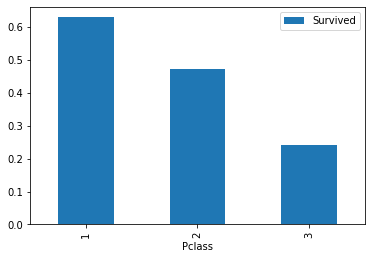

In [89]:
## survived 과 각 특징간의 대략적 관계 시각화.
### survived ~ pclass

surv_pclass = train_df.groupby(['Pclass']).Survived.mean().reset_index()
surv_pclass.plot.bar(x = 'Pclass', y=  'Survived')

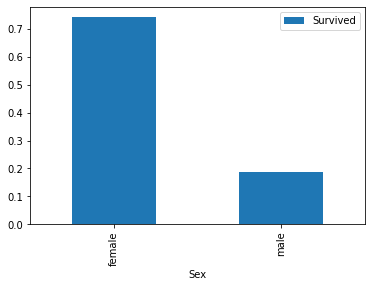

In [90]:
### survived - sex

surv_sex = train_df.groupby(['Sex']).Survived.mean().reset_index()
surv_sex.plot.bar(x = 'Sex', y = 'Survived')

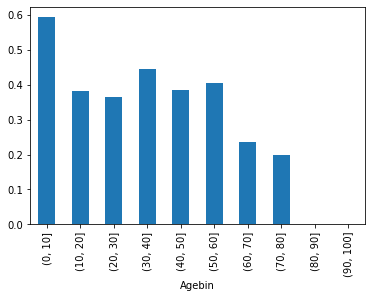

In [91]:
### survived - age

train_df['Agebin'] = pd.cut(train_df.Age,
                            bins = np.array([0,10,20,30,40,50,60,70,80,90,100]))

surv_age=  train_df.groupby(['Agebin']).Survived.mean()
surv_age.plot.bar(x = 'Agebin', y= 'Survived')


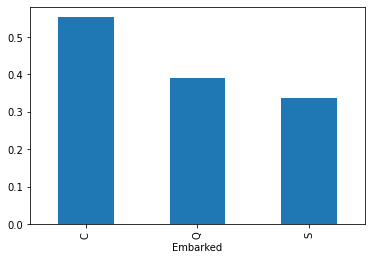

In [92]:
### survived - embarked

surv_emb = train_df.groupby(['Embarked']).Survived.mean()
surv_emb.plot.bar(x = 'Embarked',y = 'Survived')

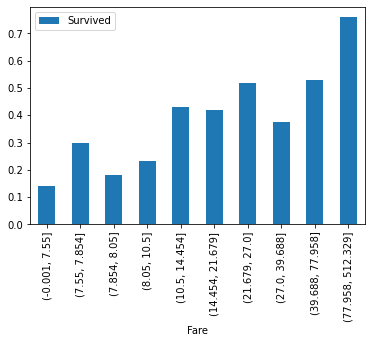

In [93]:
### survived - fare

fare_bin = pd.qcut(train_df.Fare, 10)
surv_fare = train_df.groupby(fare_bin).Survived.mean().reset_index()

surv_fare.plot.bar(x = 'Fare', y = 'Survived')

In [94]:
### survivd - sibsp

train_df.groupby(['SibSp']).Survived.mean()

SibSp
0    0.345395
1    0.535885
2    0.464286
3    0.250000
4    0.166667
5    0.000000
8    0.000000
Name: Survived, dtype: float64

In [95]:
# 결측치 처리

all_df = pd.concat([train_df, test_df])

all_df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
Agebin          595
dtype: int64

In [96]:
### callname 추출

name_df = all_df.Name.str.split(' ', 2, expand = True)

name_df.columns = ['fam_name', 'callname','name']

name_df.callname.value_counts()

Mr.             736
Miss.           256
Mrs.            191
Master.          59
Dr.               8
Rev.              8
y                 8
Planke,           4
Col.              4
Impe,             3
Billiard,         3
Mlle.             2
Carlo,            2
Ms.               2
Major.            2
Gordon,           2
Messemaeker,      2
Velde,            1
Palmquist,        1
Khalil,           1
Cruyssen,         1
Melkebeke,        1
Jonkheer.         1
Shawah,           1
the               1
Walle,            1
Capt.             1
Don.              1
Pelsmaeker,       1
Mme.              1
Steen,            1
der               1
Mulder,           1
Brito,            1
Name: callname, dtype: int64

In [97]:
## age를 callname 평균값으로 대체하자.

all_df['callname'] = name_df.callname

trans = all_df.groupby(['callname']).Age.transform('mean')

all_df.Age[all_df.Age.isnull()] = trans[all_df.Age.isnull()]

#그래도 결측값 하나 있음.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [98]:
all_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Agebin', 'callname'],
      dtype='object')

In [99]:
all_df = pd.get_dummies(all_df, columns = ['Embarked','Sex'])
all_df = all_df.drop(['Name','Cabin','Ticket','Agebin'], axis=  1)

무슨 모델을 적용할 것인가?

데이터 셋 특징 : 고려 특징 개수 많음 -> 선형모델?


ㅇㅋ 먼저 선형모델 적용해보겠음.

In [100]:
# train, test, 셋 다시 분할
training = all_df.iloc[:891].dropna()


X_train = training.drop(['Survived', 'PassengerId','callname'], axis = 1)
y_train = training.Survived


X_test = all_df.iloc[891:].drop(['Survived', 'PassengerId','callname'], axis = 1)

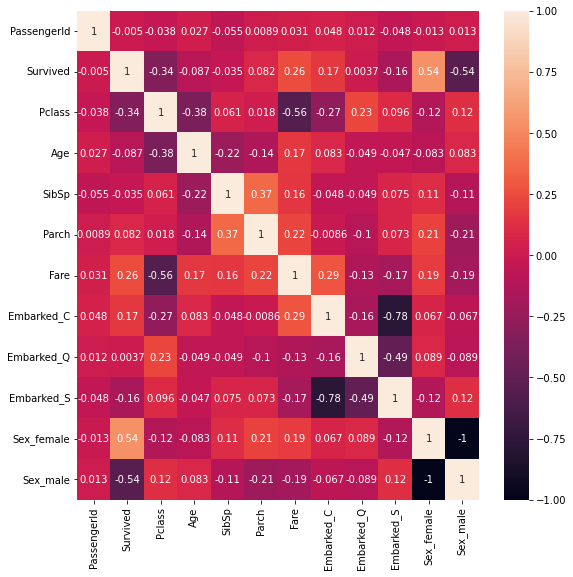

In [101]:
# 다중공선성 체크

plt.figure(figsize = (9,9))
sns.heatmap(all_df.corr(), vmin = -1, vmax = 1, annot = True)

In [102]:
# 특징 수가 많으므로 로지스틱 회귀 적용해보겠다.

from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer


In [103]:
ct = ColumnTransformer(
    [('scaling' , StandardScaler(), ['Age', 'Fare'])]
)

pipe = Pipeline([('scaler' , ct),
                 ('logistic', LogisticRegression())])

pipe.fit(X_train, y_train)

param_grid = {'logistic__C' : [0.001, 0.01, 0.1, 1, 10,100]}
grid = GridSearchCV(pipe, param_grid = param_grid, cv = 5)

grid.fit(X_train,y_train)
grid.best_params_
grid.best_score_


0.6595505617977528

In [104]:
train_df.groupby(['SibSp']).Survived.mean()

SibSp
0    0.345395
1    0.535885
2    0.464286
3    0.250000
4    0.166667
5    0.000000
8    0.000000
Name: Survived, dtype: float64

In [105]:
train_df.groupby(['Parch']).Survived.mean()

Parch
0    0.343658
1    0.550847
2    0.500000
3    0.600000
4    0.000000
5    0.200000
6    0.000000
Name: Survived, dtype: float64

초기 로지스틱 회귀의 교차검증 정확도는 66% 가량. 만족스럽지는 않은 결과다.

1.   문제점 : 상호작용, power항 배제

2.   각 변수 - surv 관계에 비선형성 발견




- 다른 모델 사용해보자.

- random forest, gradient boosting
- svm

In [106]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [107]:
# random forest
## random forest 는 전처리가 필요가 없음.

pipe = Pipeline([('random_forest', RandomForestClassifier(n_estimators = 100) )])
pipe.fit(X_train, y_train)

cross_val_score(pipe, X_train, y_train).mean()

0.8112359550561796

In [122]:
pipe = Pipeline([('gb', GradientBoostingClassifier(n_estimators=  100))])
pipe.fit(X_train, y_train)

param_grid = {'gb__learning_rate' : [0.1, 0.5, 1, 5, 10],
              'gb__max_depth' : [1,2,3]}

grid = GridSearchCV(pipe, param_grid)
grid.fit(X_train, y_train)

grid.best_params_
grid.best_score_

best_model = grid



*   항목 추가
*   항목 추가


랜덤 포레스트의 정확도는 80% 가량. 선형모델에 비해 더 좋은 성능을 발휘한다.

gradient boosting을 통해 정확도 83퍼까지 향상.

In [115]:
##SVM 적용

from sklearn.svm import SVC

ct = ColumnTransformer([('scailng', StandardScaler(), ['Age','Fare'])]) 

pipe = Pipeline([('scaler', ct),
                 ('svm', SVC())])

param_grid = [{'svm__kernel' : ['rbf'], 'svm__C' : [0.001, 0.01, 0.1, 1, 10,100], 'svm__gamma' : [0.001, 0.01, 0.1, 1, 10,100]},
              {'svm__kernel' : ['linear'], 'svm__C' : [0.001, 0.01, 0.1, 1, 10,100]}]


In [117]:
pipe.fit(X_train, y_train)

grid=  GridSearchCV(pipe, param_grid)
grid.fit(X_train, y_train)

AttributeError: ignored

In [118]:
grid.best_params_

{'svm__C': 1, 'svm__gamma': 10, 'svm__kernel': 'rbf'}

Gradient Boosting model이 가장 좋은 성능을 낸다.

In [133]:
fare_grouped = X_test.groupby('Pclass').Fare.transform('mean')

X_test.Fare[X_test.Fare.isnull()] = fare_grouped[X_test.Fare.isnull()]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Pclass        0
Age           0
SibSp         0
Parch         0
Fare          0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
Sex_female    0
Sex_male      0
dtype: int64

In [134]:
result = pd.read_csv('/content/titanic/data/gender_submission.csv')

best_model.fit(X_train, y_train)
best_model.predict(X_test)


array([0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0.,
       0., 1., 1., 0., 1., 1., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 1., 0.,
       0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0.,
       0., 1., 1., 0., 0., 1., 1., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0.,
       0., 1., 0., 1., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 1., 1.,
       1., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0., 1., 0., 1., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1., 1., 0., 1.,
       0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 1., 0., 1., 0., 1., 0., 1.,
       0., 1., 0., 1., 0.

In [138]:
result.Survived = best_model.predict(X_test).astype(int)

In [140]:
result.to_csv('/content/titanic/data/result.csv', index= False)